In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
import scipy.stats as stats
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
import numpy as np
from tensorflow import keras
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense
from sklearn.metrics import accuracy_score
from tensorflow.keras.metrics import MeanSquaredError
from tensorflow.keras.optimizers import Adam

In [2]:
# Carregar os dados do arquivo Excel
file_path = r'G:\Meu Drive\MESTRADO - MLOG\Projeto EV-Explore Ambev\TESTE_MAP_MATCHING_25_04\ENERGIA_v3.xlsx'
data = pd.read_excel(file_path)

In [3]:
data

,ID_Rota,E_cinetica,E_gravit,E_atrito,E_res_ar,E_Regen_Lin,E_Regen_Exp,ENERGIA EST. (%),ENERGIA EST. REG. LIN. (%),ENERGIA EST. REG. EXP. (%),TBGREEN (%)
0,20230901_RHQ2H04,0.199537,0.098231,0.195568,0.051162,-0.040010,-0.043564,0.544498,0.504488,0.500934,0.412
1,20230902_RHS6B08,0.185326,0.111138,0.248889,0.070658,-0.043772,-0.047662,0.616011,0.572240,0.568350,0.416
2,20230902_RHS6F90,0.207013,0.219680,0.221214,0.058543,-0.045707,-0.049484,0.706450,0.660743,0.656966,0.464
3,20230902_RHT4G96,0.194500,0.101624,0.222006,0.072888,-0.043379,-0.047387,0.591018,0.547639,0.543631,0.380
4,20230904_RHQ2H05,0.258944,0.334974,0.262168,0.052849,-0.057489,-0.062224,0.908935,0.851446,0.846711,0.524
...,...,...,...,...,...,...,...,...,...,...,...
172,20240215_RHS6B06,0.166173,0.125845,0.214158,0.056880,-0.028350,-0.030652,0.563055,0.534705,0.532403,0.368
173,20240220_RHS6F91,0.166800,0.090850,0.246604,0.061937,-0.033697,-0.037042,0.566190,0.532493,0.529148,0.372
174,20240222_RHQ2H03,0.191980,0.162978,0.241654,0.072461,-0.043122,-0.047185,0.669073,0.625951,0.621888,0.532
175,20240226_RHS6F92,0.219499,0.170535,0.301118,0.068606,-0.042007,-0.045774,0.759758,0.717750,0.713983,0.444


In [4]:
X = data[['ENERGIA EST. REG. EXP. (%)']]
y = data['TBGREEN (%)']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=697)

In [6]:
modelo_carregado = load_model('Modelo_Energia_RNA_Simples_EXP.keras')

In [7]:
previsoes = modelo_carregado.predict(X_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


In [8]:
previsoes_treino = modelo_carregado.predict(X_train)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


In [9]:
y_pred_treino = pd.DataFrame(previsoes_treino)
y_treino = pd.DataFrame(y_train)
y_pred_treino.index = y_treino.index

df_combined_treino = pd.concat([y_pred_treino,y_treino], axis=1)
df_combined_treino.columns = ['y_pred_treino', 'y_test_treino']

df_combined_treino['dif_treino'] = (df_combined_treino['y_pred_treino'] - df_combined_treino['y_test_treino'])*100

mse = mean_squared_error(df_combined_treino['y_pred_treino']*100, df_combined_treino['y_test_treino']*100)
print("MSE:", mse)

SSE = (df_combined_treino['dif_treino'] ** 2).sum()
SST = ((df_combined_treino['y_test_treino']*100 - df_combined_treino['y_test_treino'].mean()*100) ** 2).sum()

R2 = 1 - (SSE/SST)
print("Coeficiente de determinação (R²):", R2)

df_combined_treino

MSE: 27.218411372980782
Coeficiente de determinação (R²): 0.6945979519822465


,y_pred_treino,y_test_treino,dif_treino
170,0.485803,0.480,0.580265
130,0.552834,0.552,0.083445
29,0.554426,0.664,-10.957387
41,0.409751,0.360,4.975094
91,0.417894,0.352,6.589377
...,...,...,...
26,0.369094,0.424,-5.490649
56,0.560391,0.572,-1.160887
127,0.356435,0.368,-1.156476
82,0.541279,0.492,4.927860


In [10]:
y_pred = pd.DataFrame(previsoes)
y_test = pd.DataFrame(y_test)
y_pred.index = y_test.index

df_combined = pd.concat([y_pred,y_test], axis=1)
df_combined.columns = ['y_pred', 'y_test']

df_combined['dif'] = (df_combined['y_pred'] - df_combined['y_test'])*100

mse = mean_squared_error(df_combined['y_pred']*100, df_combined['y_test']*100)
print("MSE:", mse)

SSE = (df_combined['dif'] ** 2).sum()
SST = ((df_combined['y_test']*100 - df_combined['y_test'].mean()*100) ** 2).sum()

R2 = 1 - (SSE/SST)
print("Coeficiente de determinação (R²):", R2)

df_combined

MSE: 20.40897502539888
Coeficiente de determinação (R²): 0.6978315748028292


,y_pred,y_test,dif
115,0.538246,0.476,6.224598
73,0.364455,0.400,-3.554502
122,0.430290,0.432,-0.170993
50,0.535907,0.588,-5.209291
149,0.432176,0.408,2.417632
33,0.564551,0.648,-8.344918
165,0.426870,0.508,-8.112965
172,0.404761,0.368,3.676084
133,0.454853,0.444,1.085345
31,0.578866,0.608,-2.913417


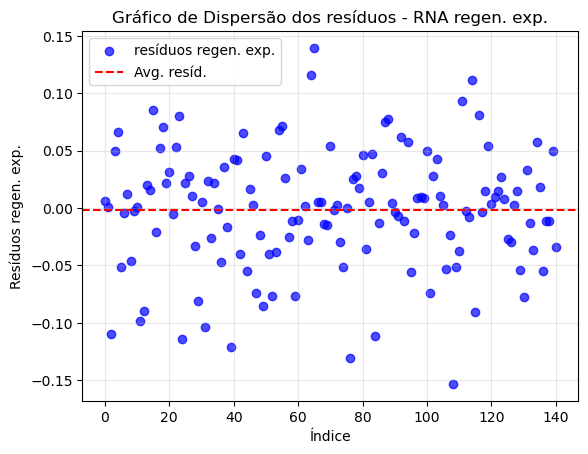

Média dos valores negativos: -0.04470737664516158
Média dos valores positivos: 0.03528686448147422
Média geral dos resíduos: -0.001589913342861425


In [11]:
import matplotlib.pyplot as plt

# Calculando a média dos valores negativos e positivos
media_negativos = df_combined_treino[df_combined_treino['dif_treino'] < 0]['dif_treino'].mean()/100
media_positivos = df_combined_treino[df_combined_treino['dif_treino'] >= 0]['dif_treino'].mean()/100
media_geral = df_combined_treino['dif_treino'].mean()/100

# Extrair os valores da coluna 'dif'
valores_dif = df_combined_treino['dif_treino']/100

# Plotar o gráfico de dispersão
plt.scatter(range(len(valores_dif)), valores_dif, color='blue', alpha=0.7, label='resíduos regen. exp.')
#plt.axhline(y=media_negativos, color='red', linestyle='--', label='Avg. resíd. (-)')
#plt.axhline(y=media_positivos, color='green', linestyle='--', label='Avg. resíd. (+)')
plt.axhline(y=media_geral, color='red', linestyle='--', label='Avg. resíd.')
plt.xlabel('Índice')
plt.ylabel('Resíduos regen. exp.')
plt.title('Gráfico de Dispersão dos resíduos - RNA regen. exp.')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

print("Média dos valores negativos:", media_negativos)
print("Média dos valores positivos:", media_positivos)
print("Média geral dos resíduos:", media_geral)

Média dos valores negativos: -3.6214464167753877
Média dos valores positivos: 3.842835975686709


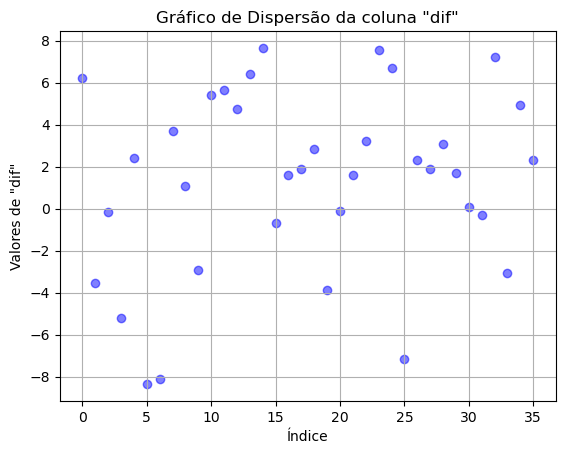

In [12]:
# Filtrar os valores negativos e calcular a média
media_negativos = df_combined[df_combined['dif'] < 0]['dif'].mean()

# Filtrar os valores positivos e calcular a média
media_positivos = df_combined[df_combined['dif'] >= 0]['dif'].mean()

print("Média dos valores negativos:", media_negativos)
print("Média dos valores positivos:", media_positivos)
import matplotlib.pyplot as plt

# Extrair os valores da coluna 'dif'
valores_dif = df_combined['dif']

# Plotar o gráfico de dispersão
plt.scatter(range(len(valores_dif)), valores_dif, color='blue', alpha=0.5)
plt.xlabel('Índice')
plt.ylabel('Valores de "dif"')
plt.title('Gráfico de Dispersão da coluna "dif"')
plt.grid(True)
plt.show()

In [13]:
#caminho_arquivo = r"C:\Users\duart\OneDrive\Desktop\df_combined_08_05.xlsx"

# Salvar o DataFrame em um arquivo Excel no caminho especificado
#df_combined.to_excel(caminho_arquivo, index=False)

#print("DataFrame salvo com sucesso em", caminho_arquivo)